#### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import numpy as np

In [2]:
data = pd.read_csv('./data/model_data_v2.csv')
single = pd.read_csv('./data/model_single_txns.csv')
lr = pd.read_csv('./data/lr_analysis.csv')
coefs = pd.read_csv('./data/lr_coefficients.csv', index_col=0)
svr = pd.read_csv('./data/svr_analysis.csv')
stats = pd.read_csv('./data/stats.csv', index_col=0).rename(columns={'0':'stats'}).T

In [10]:
score_cols = ["1of1_score","watch_score","background_score","beard_score","chain_score","eyes_score","hat_over_headphones_score","hat_under_headphones_score","headphones_score","long_hair_score","mouth_score","shirt_score","short_hair_score","smoke_score","type_score","rarity_score"]
rarity_cols = ["1of1_rarity","watch_rarity","background_rarity","beard_rarity","chain_rarity","eyes_rarity","hat_over_headphones_rarity","hat_under_headphones_rarity","headphones_rarity","long_hair_rarity","mouth_rarity","shirt_rarity","short_hair_rarity","smoke_rarity"]
feature_cols = ['1/1','4:20 watch','background','beard', 'chain', 'eyes','hat over headphones','hat under headphones','headphones','long hair','mouth','shirt','short hair','smoke','type']
non_cols = ['date', 'token_id', 'payment', 'buyer', 'seller', 'price', 'priceUsd']
stats_cols = ['1d_avg_price', '7d_avg_price','30d_avg_price', 'average_price', 'floor_price']
eng_cols = ['last_10_avg','last_10_max', 'last_10_min', 'last_25_avg', 'last_25_max','last_25_min', 'last_sale_price']

-----

#### Model Analysis

In [5]:
data.columns

Index(['date', 'token_id', 'payment', 'buyer', 'seller', 'price', 'priceUsd',
       '1/1', '4:20 watch', 'background', 'beard', 'chain', 'eyes',
       'hat over headphones', 'hat under headphones', 'headphones',
       'long hair', 'mouth', 'shirt', 'short hair', 'smoke', 'type',
       '1of1_rarity', 'watch_rarity', 'background_rarity', 'beard_rarity',
       'chain_rarity', 'eyes_rarity', 'hat_over_headphones_rarity',
       'hat_under_headphones_rarity', 'headphones_rarity', 'long_hair_rarity',
       'mouth_rarity', 'shirt_rarity', 'short_hair_rarity', 'smoke_rarity',
       'type_rarity', '1of1_score', 'watch_score', 'background_score',
       'beard_score', 'chain_score', 'eyes_score', 'hat_over_headphones_score',
       'hat_under_headphones_score', 'headphones_score', 'long_hair_score',
       'mouth_score', 'shirt_score', 'short_hair_score', 'smoke_score',
       'type_score', 'rarity_score', '1d_avg_price', '7d_avg_price',
       '30d_avg_price', 'average_price', 'floor_pri

In [7]:
# visualizing correlation between predictor variables

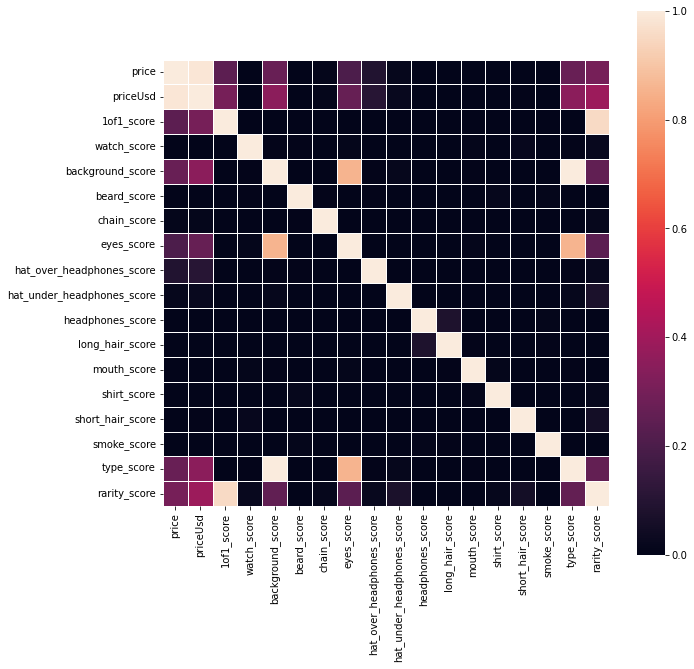

In [105]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data[['price','priceUsd']+score_cols].corr(), vmin=0, vmax=1, square=True, linewidths=1, ax=ax);

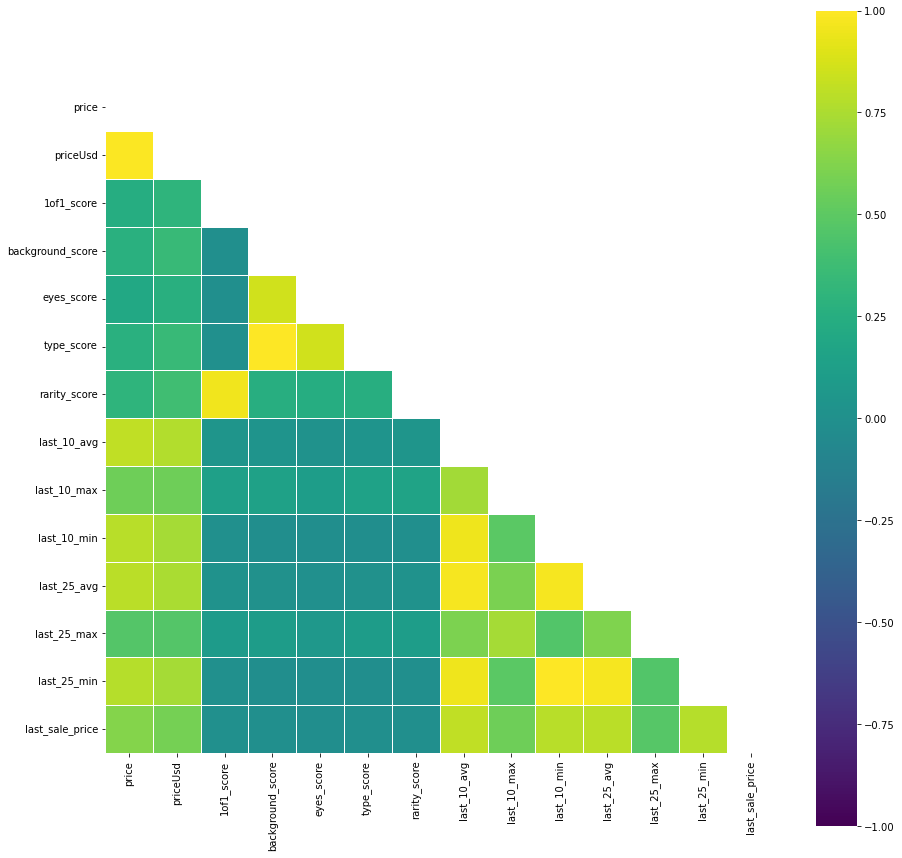

In [103]:
corr = data[['price', 'priceUsd', '1of1_score', 'background_score', 'eyes_score', 'type_score', 'rarity_score', 'last_10_avg', 'last_10_max', 'last_10_min', 'last_25_avg', 'last_25_max', 'last_25_min', 'last_sale_price']].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr, vmin=-1, vmax=1, square=True, linewidths=1, ax=ax, mask=mask, cmap='viridis');

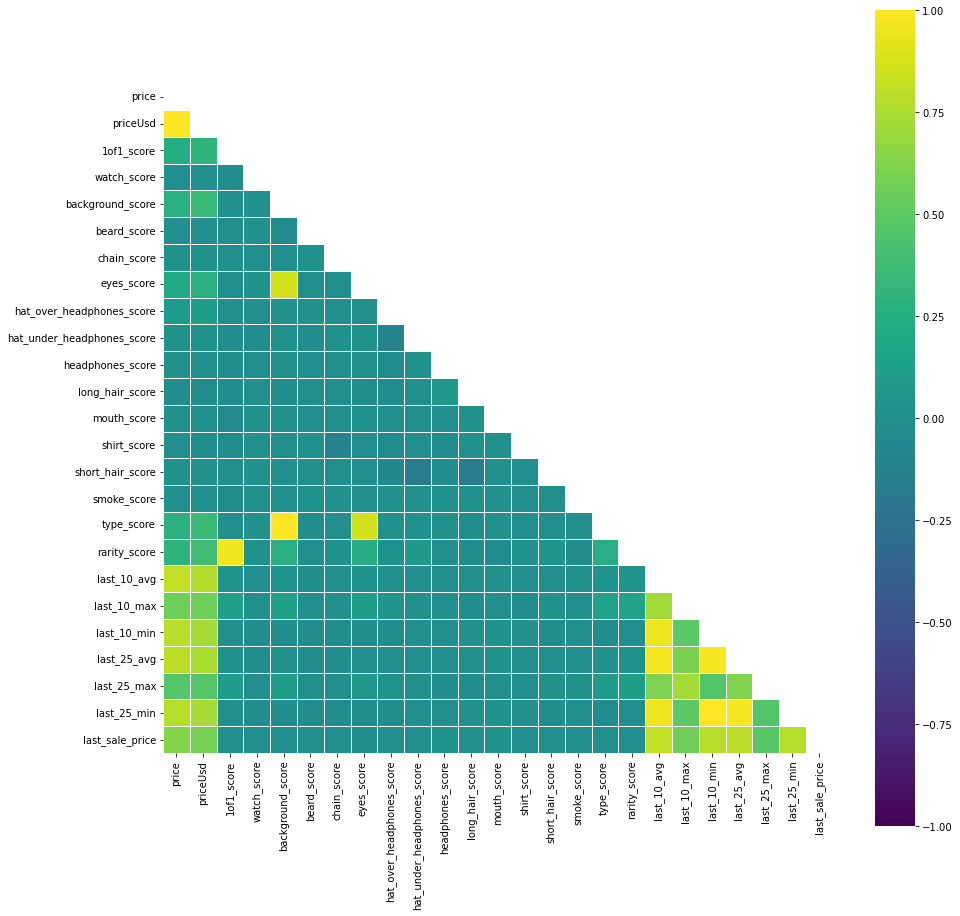

In [92]:
corr = data[['price','priceUsd']+score_cols+eng_cols].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr, vmin=-1, vmax=1, square=True, linewidths=1, ax=ax, mask=mask, cmap='viridis');

In [106]:
correlations = pd.DataFrame(data[['price','priceUsd']+score_cols+eng_cols].corr()['price'].sort_values(ascending=False))
correlations[2:]

price
last_10_avg                 0.810
last_25_avg                 0.795
last_10_min                 0.784
last_25_min                 0.780
last_sale_price             0.628
last_10_max                 0.556
last_25_max                 0.469
rarity_score                0.303
type_score                  0.267
background_score            0.266
1of1_score                  0.241
eyes_score                  0.201
hat_over_headphones_score   0.088
hat_under_headphones_score  0.013
chain_score                 0.010
short_hair_score            0.002
mouth_score                 0.001
headphones_score            0.001
smoke_score                -0.004
watch_score                -0.012
shirt_score                -0.015
beard_score                -0.016
long_hair_score            -0.027

In [43]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
coefs.sort_values(by='coefs', ascending=False)[:10]

coefs
type_rarity               2088.204
type_score                 857.607
hat_over_headphones_score   21.162
mouth_score                 17.925
rarity_score                 8.628
beard_score                  2.897
chain_score                  2.448
last_10_avg                  0.554
last_25_avg                  0.265
last_10_min                  0.227

In [45]:
coefs.sort_values(by='coefs', ascending=False)[-10:]

coefs
smoke_score                  -2.654
hat_under_headphones_score   -2.867
short_hair_score             -4.048
1of1_score                   -4.807
watch_score                  -5.660
shirt_score                  -8.154
eyes_score                  -18.714
long_hair_score             -19.361
last_sale_price            -139.360
background_score           -825.483

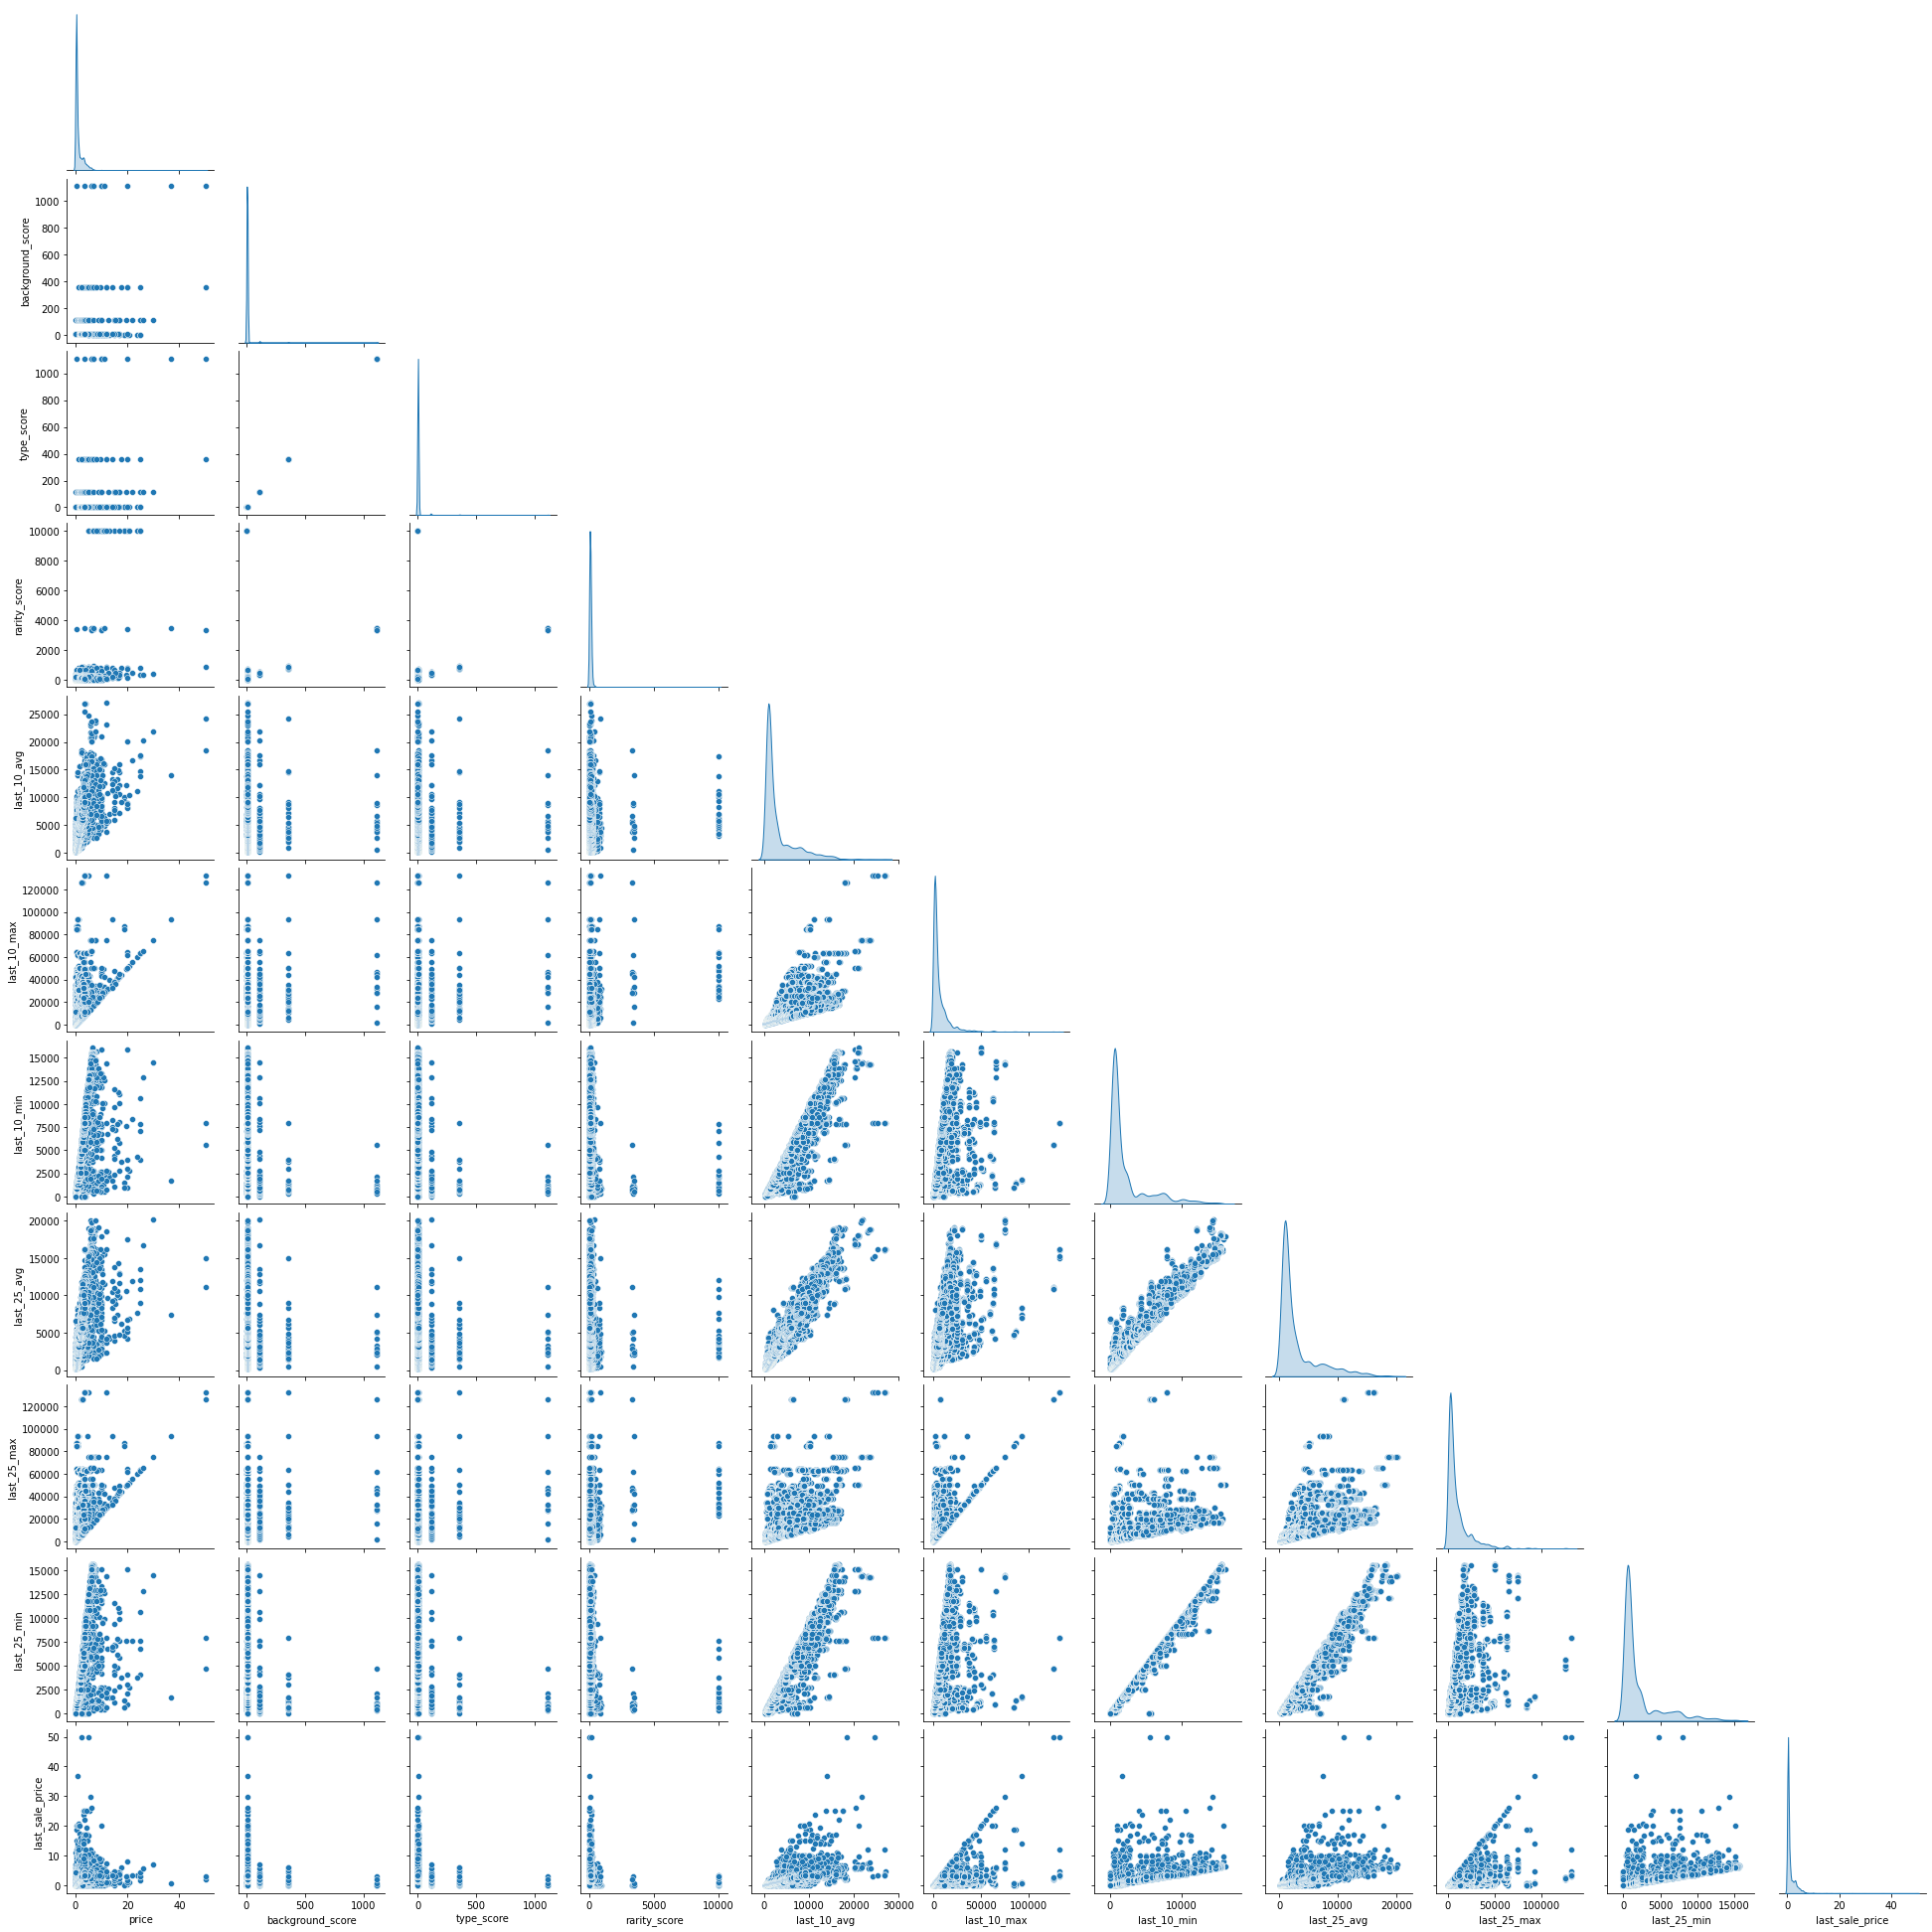

In [80]:
sns.pairplot(
    data[['price', 'background_score', 'type_score', 'rarity_score', 'last_10_avg', 'last_10_max', 'last_10_min', 'last_25_avg', 'last_25_max', 'last_25_min', 'last_sale_price']],
    kind='scatter',
    diag_kind="kde",
    corner=True
)

In [81]:
lr.head()

token_id  rarity_score  last_sale_price  price   priceUsd  predictions  \
0       905       852.083            3.000 50.000 132555.351    37402.645   
1       904      3356.068            2.250 50.000 126373.806    56605.947   
2      2983       473.910            3.400 22.000  55803.086    19665.837   
3      4707      3442.309            0.220  3.500  16153.897    46998.832   
4      4657       127.166            7.990 20.000  50381.479    20246.769   

    residual  abs_residual  
0  95152.707     95152.707  
1  69767.860     69767.860  
2  36137.248     36137.248  
3 -30844.934     30844.934  
4  30134.710     30134.710

In [82]:
svr.head()

token_id  rarity_score  last_sale_price  price   priceUsd      preds  \
0      1079       712.388            0.216  2.500  11770.144 -20964.448   
1       904      3356.068            2.250 50.000 126373.806  96813.671   
2      6812       171.373            2.890 10.000  25365.039   6343.351   
3      8821        13.877            4.000 10.500  27885.885   9178.814   
4      8024       114.590            3.400 14.000  35519.999  17977.390   

     resids  abs_resids  
0 32734.592   32734.592  
1 29560.135   29560.135  
2 19021.688   19021.688  
3 18707.071   18707.071  
4 17542.609   17542.609

In [ ]:
plt.scatter(preds, residuals)
plt.axhline(0, color = 'hotpink');

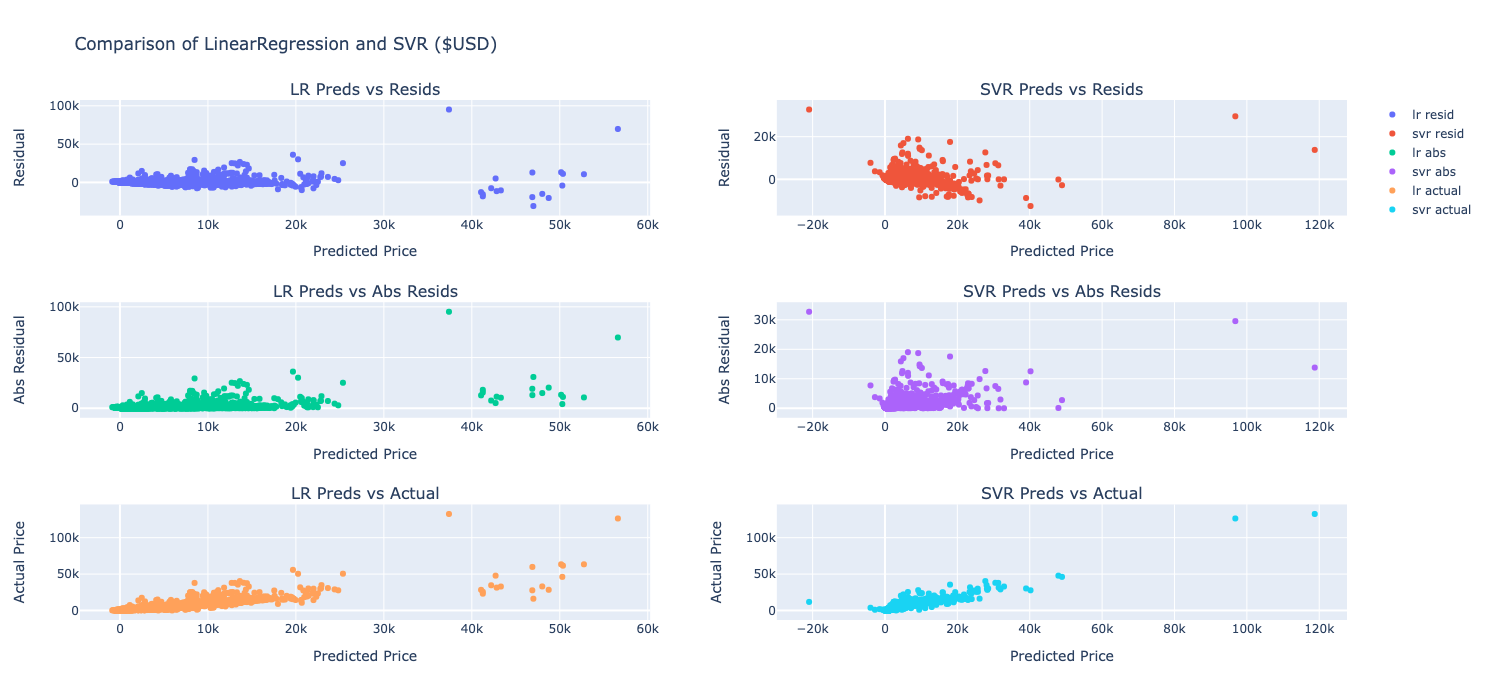

In [102]:
#comparison of linear regression and support vector machine regressor

#create subplots
fig = make_subplots(
    rows=3, cols=2, subplot_titles=("LR Preds vs Resids", "SVR Preds vs Resids", "LR Preds vs Abs Resids", "SVR Preds vs Abs Resids", "LR Preds vs Actual", "SVR Preds vs Actual")
)

#add traces
#preds vs resids
fig.add_trace(go.Scatter(x=lr.predictions, y=lr.residual, mode='markers', name='lr resid', hovertext=lr['token_id']), row=1, col=1)
fig.add_trace(go.Scatter(x=svr.preds, y=svr.resids, mode='markers', name='svr resid', hovertext=svr['token_id']), row=1, col=2)
#preds vs absolute resids
fig.add_trace(go.Scatter(x=lr.predictions, y=lr.abs_residual, mode='markers', name='lr abs', hovertext=lr['token_id']), row=2, col=1)
fig.add_trace(go.Scatter(x=svr.preds, y=svr.abs_resids, mode='markers', name='svr abs', hovertext=svr['token_id']), row=2, col=2)
#preds vs actuals
fig.add_trace(go.Scatter(x=lr.predictions, y=lr.priceUsd, mode='markers', name='lr actual', hovertext=lr['token_id']), row=3, col=1)
fig.add_trace(go.Scatter(x=svr.preds, y=svr.priceUsd, mode='markers', name='svr actual', hovertext=svr['token_id']), row=3, col=2)

#update x-axes
fig.update_xaxes(title_text="Predicted Price", row=1, col=1)
fig.update_xaxes(title_text="Predicted Price", row=1, col=2)
fig.update_xaxes(title_text="Predicted Price", row=2, col=1)
fig.update_xaxes(title_text="Predicted Price", row=2, col=2)
fig.update_xaxes(title_text="Predicted Price", row=3, col=1)
fig.update_xaxes(title_text="Predicted Price", row=3, col=2)

#update y-axes
fig.update_yaxes(title_text="Residual", row=1, col=1)
fig.update_yaxes(title_text="Residual", row=1, col=2)
fig.update_yaxes(title_text="Abs Residual", row=2, col=1)
fig.update_yaxes(title_text="Abs Residual", row=2, col=2)
fig.update_yaxes(title_text="Actual Price", row=3, col=1)
fig.update_yaxes(title_text="Actual Price", row=3, col=2)

fig.update_layout(title_text="Comparison of LinearRegression and SVR ($USD)", height=700)

fig.show()